In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv("C:\\Users\\DELL\\OneDrive\\Pictures\\IMDB Dataset.csv")

In [7]:
data.shape

(50000, 2)

In [9]:
data.isnull().sum()

review       0
sentiment    0
dtype: int64

In [ ]:
no null value found matlab our dataset is clean

In [11]:
data["sentiment"].value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

In [25]:
data["sentiment"]=data["sentiment"].replace(["positive","negative"],[1,0])

In [27]:
data["sentiment"].value_counts()

sentiment
1    25000
0    25000
Name: count, dtype: int64

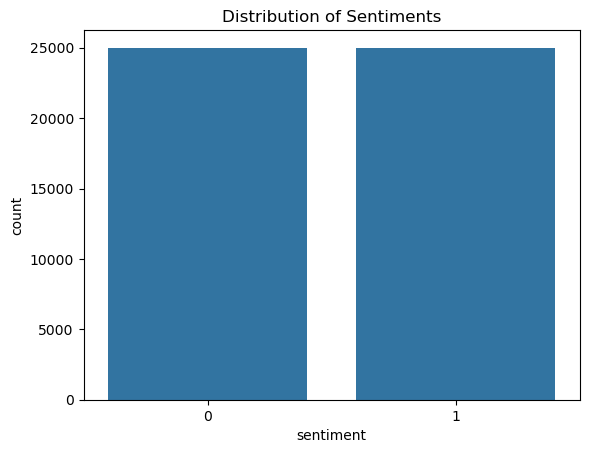

In [85]:
# visualise the distribution of sentiments
sns.countplot(x="sentiment", data=data)
plt.title("Distribution of Sentiments")
plt.show()

data cleaning and preprocessing

convert all the review column text  into lower case

In [29]:
data["review"]=data["review"].apply(lambda x:x.lower())

In [ ]:
second=remove all the punctation because it does not add any meaning in
sentiment analysis so we use regex to remove punctation


In [31]:
import re
data["review"]=data["review"].apply(lambda x:re.sub(r'[^\w\s]',"",x))

In [ ]:
third= we have to also remove numbers removing number is optional 

In [33]:
def remove_number(txt):
    new=""
    for i in txt:
        if not i.isdigit():
            new=new+i
    return new

In [35]:
data["review"]=data["review"].apply(remove_number)

In [ ]:
fourth=most important thing remove emoji

In [39]:
def remove_emoji(txt):
    new=""
    for i in txt:
        if i.isascii():
            new=new+i
    return new


In [41]:
data["review"]=data["review"].apply(remove_emoji)

In [ ]:
in ml context we remove stopword from our dataset so do this
there are two ways to remove stopwords first is tokenization method and second
is split but there are some limitation in split method first we have to remove 
punctation from our dataset to use split method

In [43]:
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [47]:
def remove(txt):
    words=txt.split()
    cleaned=[]
    for i in words:
        if i not in stop_words:
            cleaned.append(i)
    return " ".join(cleaned)


In [49]:
data["review"]=data["review"].apply(remove)

In [51]:
data["review"].head(1)

0    one reviewers mentioned watching oz episode yo...
Name: review, dtype: object

In [59]:
#so finally all stopwords are remove by basic split method

In [63]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data['review'], data['sentiment'], test_size=0.20, random_state=42)

In [ ]:
yaha par x train x test main humara review wala column stored hua hain
now ml do not understand text it only understand number so we do feature 
extraction here we use countvectorizer,tfidfvectorizer

In [ ]:
#here we use two feature extraction method countvectorizer and tfidfvectorizer

# hum yaha par do model use karenge one is naive bayes and second is
#logistics regression

so for text classification the naive bayes model we use are multinomialnb

In [65]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
#multinomialnb

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

bow_vectorizer = CountVectorizer()
X_train_bow = bow_vectorizer.fit_transform(X_train)
X_test_bow = bow_vectorizer.transform(X_test)


nb_model = MultinomialNB()
nb_model.fit(X_train_bow, y_train)


pred_bow = nb_model.predict(X_test_bow)
print(accuracy_score(y_test, pred_bow))

0.8592


so by using CountVectorizer feature extraction method in multinomialnb model
we get a accuracy of 85 percent

In [89]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test,pred_bow))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86      4961
           1       0.88      0.84      0.86      5039

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



this is overall report of this model like precision kitna hain 
recall value kitna hain

now let see second feature extraction method tfidfvectorizer
with multinomialnb model

In [69]:
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)
nb2_model = MultinomialNB()
nb2_model.fit(X_train_tfidf,y_train)

MultinomialNB()

In [71]:
y_pred = nb2_model.predict(X_test_tfidf)

In [73]:
print(accuracy_score(y_test, y_pred))

0.8694


In [ ]:
so by using tfidfvectorizer  feature extraction method in multinomialnb model
we get a accuracy of 86 percent

In [87]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.89      0.87      4961
           1       0.88      0.85      0.87      5039

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



this is overall report of this  multinomialnb model like precision kitna hain 
recall value kitna hain ye sab cheeje

In [75]:
#logistics regression model 
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train_tfidf,y_train)
log_pred = logistic_model.predict(X_test_tfidf)

In [77]:
print(accuracy_score(y_test,log_pred ))

0.8961


we get a overall accuracy of 89 percent by using logistics regression model

In [81]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test,log_pred))

              precision    recall  f1-score   support

           0       0.91      0.88      0.89      4961
           1       0.89      0.91      0.90      5039

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



overall report of logistics regression model in tfidf feature extraction method

Conclusion  
Both Naive Bayes and Logistic Regression work very good with a good precision recall and accuracy
on IMDB sentiment classification  
Logistic Regression has more higher accuracy compared to Naive Bayes  
This shows that linear models handle TFIDF very good 

insight we get from this   
Cleaning steps we follow proper pipeline like (lowercasing, removing punctuation, stopwords,removing number,remove emoji) improved model performance  
TFIDF vectorizer gave better results than CountVectorizer  
simple models like(Logistic Regression, Naive Bayes) can achieve strong results on text classification  
  
